## matplotlibの使い方メモ

matplotlibの使い方をメモしておきます。新しい使い方を覚えるごとに更新していきます。

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/matplotlib/mat_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/matplotlib/mat_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)

matplotlib version : 3.0.3
scipy version : 1.4.1
numpy version : 1.16.2


## 簡単なグラフを書く

$y = \sin x$の関数を書いてみます。マニアックな使い方が色々あるようですが、データ分析の仕事をしていると、この形で使うことが一番多いような気がしています。グリッドやラベルの設定は重要です。matplotlibの中にtexを使えるかどうかは環境による気がします。

- plt.grid()
- plt.title()
- plt.xlabel()
- plt.ylabe()
- plt.xlim()
- plt.legend()

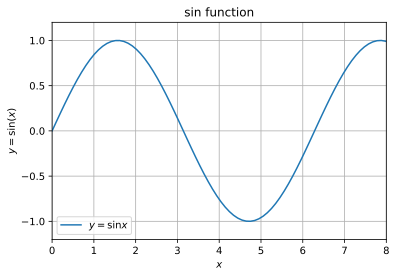

In [4]:
x = np.linspace(0,10,100)
y = np.sin(x)

plt.grid()
plt.title("sin function")
plt.xlabel("$x$")
plt.ylabel("$y = \\sin(x)$")
plt.xlim(0,8)
plt.ylim(-1.2,1.2)
plt.plot(x,y,label="$y=\\sin x$")

plt.legend()

## 複数のグラフを書く


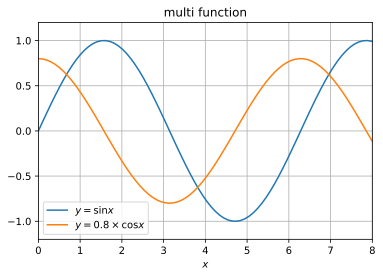

In [5]:
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = 0.8 * np.cos(x)

plt.grid()
plt.title("multi function")
plt.xlabel("$x$")
plt.xlim(0,8)
plt.ylim(-1.2,1.2)
plt.plot(x,y1, label="$y = \\sin x$")
plt.plot(x,y2, label="$y = 0.8 \\times \\cos x$")
plt.legend()

### グラフの線種や色を変更

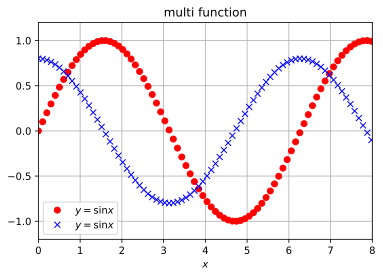

In [6]:
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = 0.8 * np.cos(x)

plt.grid()
plt.title("multi function")
plt.xlabel("$x$")
plt.xlim(0,8)
plt.ylim(-1.2,1.2)
plt.plot(x, y1, "o", color="red", label="$y = \\sin x$")
plt.plot(x, y2, "x", color="blue", label="$y = \\sin x$")
plt.legend()

## ヒストグラムを作成する

正規分布から10000サンプルをヒストグラムで表示しています。
密度分布を可視化することと同義です。

0.6133321064399502


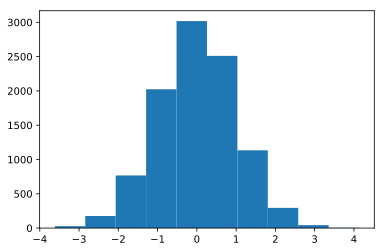

In [7]:
x = np.random.randn(10000)

plt.hist(x)
print(np.random.rand())

binなどを設定する事ができます。この辺は数をこなせば自然と覚えてしまいます。

(array([1.000e+00, 5.000e+00, 1.200e+01, 2.300e+01, 8.100e+01, 2.310e+02,
        3.870e+02, 7.010e+02, 1.113e+03, 1.408e+03, 1.533e+03, 1.400e+03,
        1.224e+03, 8.810e+02, 4.920e+02, 2.910e+02, 1.370e+02, 5.300e+01,
        1.800e+01, 9.000e+00]),
 array([-4.12992138, -3.74406193, -3.35820248, -2.97234303, -2.58648358,
        -2.20062413, -1.81476468, -1.42890523, -1.04304578, -0.65718634,
        -0.27132689,  0.11453256,  0.50039201,  0.88625146,  1.27211091,
         1.65797036,  2.04382981,  2.42968926,  2.81554871,  3.20140816,
         3.58726761]),
 <a list of 20 Patch objects>)

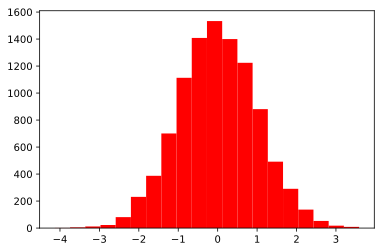

In [8]:
x = np.random.randn(10000)
plt.hist(x, bins=20,color="red")

## 三次元のグラフを書く
それほど頻度が多いわけではないですが、3次元のグラフを書いてみます。データ分析は数百次元とか当たり前ですが、人間の感覚で理解できる次元数は3次元がやっとですね。私は3次元でも正直辛いです。。。

mplot3dというモジュールを利用します。また、3次元のグラフに特有なのがmeshgridというnumpyの関数を利用します。

通常、$ z = x + y$という平面を$xyz$空間にプロットするには、$x$と$y$の要素数は$N(x) \times N(y)$で決定されます。本来ならばこの分だけ配列を作成する必要がありますが、これを自動的に作成してくれるのがmeshgridになります。

例を見てみます。

In [9]:
x = np.array([i for i in range(5)])
y = np.array([i for i in range(5)])

print('x :', x)
print('y :', y)
print()
xx, yy = np.array(np.meshgrid(x, y))
print('xx :', xx)
print()
print('yy :', yy)

x : [0 1 2 3 4]
y : [0 1 2 3 4]

xx : [[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]

yy : [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


$xx$が25個の座標の$x$座標です。同様に、$yy$が25個の座標の$y$座標になります。とても便利です。

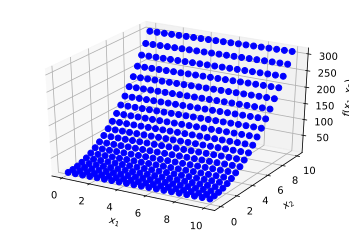

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# 2変数関数を適当に作成
def get_y(x1,x2):
  return x1 + 3 * x2 * x2 + 1

x1 = np.linspace(0,10,20)
x2 = np.linspace(0,10,20)

X1, X2 = np.meshgrid(x1, x2)
Y = get_y(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")

ax.plot(np.ravel(X1), np.ravel(X2), np.ravel(Y), "o", color='blue')
plt.show()

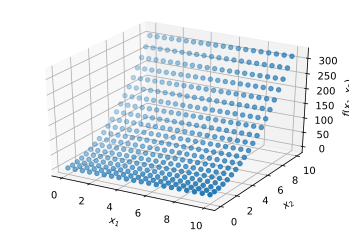

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_zlabel("$f(x_1, x_2)$")

ax1.scatter3D(np.ravel(X1), np.ravel(X2), np.ravel(Y))
plt.show()

3次元のプロットでは、pyplot(plt)を直接いじると言うよりは、`fig=plt.figure()`でfigureオブジェクトを作り、その中でグラフを作成します。